# In the previous episode...

### learned to read and write files
```python
with open("old_shiny_file.txt", "r") as fh:
    content = fh.read()
    
with open("new_shiny_file.txt", "w") as fh:
    fh.write("hey, this is cool!!\n" * 20)
```

and implemented an "Ishmael" counter

# .. and now

# Introduction to Data Analysis
We'll download a dataset ([original source](https://www.kaggle.com/unsdsn/world-happiness)) and visualise it.

In [1]:
# Don't worry about the code in this cell for now, we'll get to this stuff a future lesson
import urllib.request
import zipfile
import os

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/gabrielecalvo/Language4Water/master/assets/HappinessReport.zip",
    "HappinessReport.zip",
)
print("downloaded")

with zipfile.ZipFile("HappinessReport.zip", "r") as zip_ref:
    zip_ref.extractall("HappinessReport")
print("unzipped")

os.remove("HappinessReport.zip")
print("removed zipped file")

downloaded
unzipped
removed zipped file


## loading data from a single csv

In [2]:
import pandas as pd

df = pd.read_csv(r"HappinessReport\2015.csv", index_col=0)

df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


### selecting

In [3]:
# selecting by row
df.loc["Switzerland"]  # by label
df.iloc[1]  # by index

Region                           Western Europe
Happiness Rank                                2
Happiness Score                           7.561
Standard Error                          0.04884
Economy (GDP per Capita)                1.30232
Family                                  1.40223
Health (Life Expectancy)                0.94784
Freedom                                 0.62877
Trust (Government Corruption)           0.14145
Generosity                               0.4363
Dystopia Residual                       2.70201
Name: Iceland, dtype: object

In [4]:
# select by column(s)
df["Region"]  # returns a single column (Series)
df.loc[:, "Region"]  # equivalent longer form

df[["Region"]]  # returns a table (DataFrame) with one column
df[["Region", "Family"]]  # returns a table (DataFrame) with 2 columns

,Region,Family
Country,,
Switzerland,Western Europe,1.34951
Iceland,Western Europe,1.40223
Denmark,Western Europe,1.36058
Norway,Western Europe,1.33095
Canada,North America,1.32261
...,...,...
Rwanda,Sub-Saharan Africa,0.77370
Benin,Sub-Saharan Africa,0.35386
Syria,Middle East and Northern Africa,0.47489


In [5]:
# select by both row and column
df.loc["Switzerland", "Region"]

'Western Europe'

In [6]:
# select by condition
# to combine, use `&` (and), `|` (or), `~` (not)

mask = (df["Generosity"] < 0.2) | (df["Family"] > 1)

df[mask]

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


### sorting

In [7]:
df.sort_index()  # sort by index (Country)
df.sort_values("Freedom")  # sort by specific column
df.sort_values("Freedom", ascending=False)  # sort by specific column but in reverse order

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
...,...,...,...,...,...,...,...,...,...,...,...
Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
Sudan,Sub-Saharan Africa,118,4.550,0.06740,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857
Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367


In [8]:
# group by
df.groupby("Region")["Happiness Score"].mean().sort_index()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

# Plotting
Below are just some examples.
If interested, I suggest you look at the well written official documentation: https://pandas.pydata.org/docs/user_guide/visualization.html

pandas Series (individual column objects) and pandas Dataframes (data tables) had `.plot` method that allows quick and efficient plotting of data.
By default, calling `.plot()` is going to call `.plot.line()`, but there are [many other types of plots](https://pandas.pydata.org/docs/user_guide/visualization.html) supported.

<AxesSubplot:>

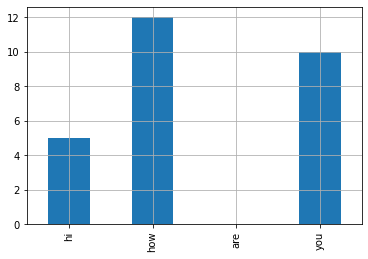

In [9]:
pd.Series({"hi": 5, "how": 12, "are": 0, "you": 10}).plot.bar(grid=True)  # same as `.plot.line()`

## plotting relationships

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Generosity'>

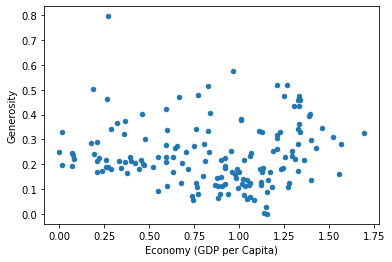

In [10]:
df.plot.scatter(  # creating a scatterplot of
    x="Economy (GDP per Capita)",  # using "GDP/capita" on the horizontal axis
    y="Generosity",  # using "Generosity" on the vertical axis
)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Generosity'>

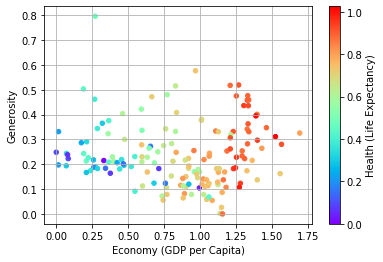

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df.plot.scatter(  # creating a scatterplot of
    x="Economy (GDP per Capita)",  # using "GDP/capita" on the horizontal axis
    y="Generosity",  # using "Generosity" on the vertical axis
    c="Health (Life Expectancy)",  # color it by "Health (Life Expectancy)"
    cmap="rainbow",  # using a rainbow color spectrum
    grid=True,  # plotting the grid underneath
    ax=ax,  # use the previously defined axis (otherwise the x-axis label will not show, known bug)
)

### Group Bar Plot

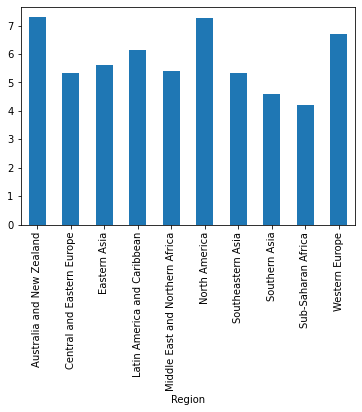

In [12]:
# grouping by region, taking the average ...
regional_means = df.groupby("Region").mean()

# ... and plotting the Happiness Score as a bar plot
ax = regional_means["Happiness Score"].plot.bar()

### saving the figure to file

In [13]:
ax.figure.savefig("myplot.jpeg", bbox_inches="tight")  # saving the file... without cutting out the lables

# For more..
If you find data analysis with pandas interesting and/or useful, I created an open tutorial with exercises along the way that you might find useful:
[https://github.com/gabrielecalvo/pandas_tutorial](https://github.com/gabrielecalvo/pandas_tutorial#pandas-tutorial)

# Exercise
Load data from each year and plot the evolution of the `Happiness Score` of your favourite country over the years

In [ ]:
...

### possible solution

In [ ]:
my_country = "Italy"

pd.Series(
    {
        "2015": pd.read_csv("HappinessReport/2015.csv", index_col=0).loc[my_country, "Happiness Score"],
        "2016": pd.read_csv("HappinessReport/2016.csv", index_col=0).loc[my_country, "Happiness Score"],
        "2017": pd.read_csv("HappinessReport/2017.csv", index_col=0).loc[my_country, "Happiness.Score"],
        "2018": pd.read_csv("HappinessReport/2018.csv", index_col=1).loc[my_country, "Score"],
        "2019": pd.read_csv("HappinessReport/2019.csv", index_col=1).loc[my_country, "Score"],
    }
).plot(title="Happiness Score")

In [ ]:
pd.Series(
    {
        "2015": pd.read_csv("HappinessReport/2015.csv", index_col=0).loc[my_country, "Happiness Rank"],
        "2016": pd.read_csv("HappinessReport/2016.csv", index_col=0).loc[my_country, "Happiness Rank"],
        "2017": pd.read_csv("HappinessReport/2017.csv", index_col=0).loc[my_country, "Happiness.Rank"],
        "2018": pd.read_csv("HappinessReport/2018.csv", index_col=1).loc[my_country, "Overall rank"],
        "2019": pd.read_csv("HappinessReport/2019.csv", index_col=1).loc[my_country, "Overall rank"],
    }
).plot(title="Happiness Rank")